# Perth Wind and Solar Research Report

This notebook presents a detailed report based on the existing files in this folder.

## Data inputs used

- `perth_atlas_extracted_metrics.csv`
- `wa_existing_and_planned_wind_solar_projects.csv`
- `cleaning_report.txt`
- prior summary notes in `Perth_Wind_Solar_Research_Summary.md`

## Goal

Assess whether Perth/WA has strong practical potential for:

1. Onshore wind,
2. Offshore wind,
3. Utility-scale solar PV,

by combining project status research and atlas-based resource indicators.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

plt.style.use("seaborn-v0_8-whitegrid")
pd.options.display.float_format = "{:,.3f}".format

# Support running this notebook from either:
# - Week02/.../lab
# - Week02/.../wind_data_cleaning
here = Path(".").resolve()
candidates = [here, here / "wind_data_cleaning", here.parent / "wind_data_cleaning"]

base = None
for c in candidates:
    if (c / "perth_atlas_extracted_metrics.csv").exists() and (c / "wa_existing_and_planned_wind_solar_projects.csv").exists():
        base = c
        break

if base is None:
    raise FileNotFoundError("Could not find required data files. Expected them in current folder or a 'wind_data_cleaning' subfolder.")

atlas_path = base / "perth_atlas_extracted_metrics.csv"
projects_path = base / "wa_existing_and_planned_wind_solar_projects.csv"
cleaning_report_path = base / "cleaning_report.txt"

atlas_df = pd.read_csv(atlas_path)
projects_df = pd.read_csv(projects_path)
cleaning_report = cleaning_report_path.read_text(encoding="utf-8")

print("Using data folder:", base)
print("Atlas rows:", len(atlas_df))
print("Projects rows:", len(projects_df))
print("\nCleaning report preview:\n")
print(cleaning_report)

Using data folder: C:\Users\Batuhan\Desktop\CE 49X Files\CE49X\Week02_Python_Modules_and_Data_Science\wind_data_cleaning
Atlas rows: 17
Projects rows: 7

Cleaning report preview:

Wind dataset cleaning report
Raw shape: (8764, 407)
Clean shape (time rows): (8760, 407)
Rows dropped due to invalid/duplicate time: 0
Columns (excluding Time): 406
Missing values before imputation: 357249
Missing values after imputation: 0
Outputs:
- C:\Users\Batuhan\Desktop\CE 49X Files\CE49X\Week03_NumPy_Pandas\wind_data_cleaning\wind_spatiotemporal_cleaned.csv
- C:\Users\Batuhan\Desktop\CE 49X Files\CE49X\Week03_NumPy_Pandas\wind_data_cleaning\wind_spatiotemporal_cleaned_imputed.csv
- C:\Users\Batuhan\Desktop\CE 49X Files\CE49X\Week03_NumPy_Pandas\wind_data_cleaning\wind_turbine_coordinates.csv


## 1) Existing and Planned Projects in WA (Research Summary)

The table below consolidates projects identified from official/project-owner sources.

In [12]:
projects_df

,technology,project,status,capacity_MW,location_note,source_url
0,Onshore wind,Emu Downs Wind Farm,Operating,80.000,North of Perth (Badgingarra/Jurien Bay region),https://www.apa.com.au/operations-and-projects...
1,Onshore wind,Collgar Wind Farm,Operating,222.000,Near Merredin (~east of Perth),https://www.collgar.com.au/collgar-wind-farm
2,Onshore wind,Albany + Grasmere Wind Farm,Operating,35.400,Great Southern WA (feeds SWIS),https://www.synergy.net.au/Our-energy/Electric...
3,Solar PV,Emu Downs Solar Farm,Operating/Completed,20.000,Co-located with Emu Downs Wind Farm,https://arena.gov.au/projects/emu-downs-solar-...
4,Solar PV,Greenough River Solar Farm,Operating (expanded),40.000,Near Geraldton (SWIS region),https://www.synergy.net.au/Our-energy/Electric...
5,Solar PV,Merredin Solar Farm,Under construction / developing,100.000,~260 km east of Perth,https://www.wa.gov.au/organisation/energy-poli...
6,Offshore wind,Bunbury offshore wind area,Declared/proposed; no operating project yet,NaN,"Indian Ocean off Bunbury, closest point ~20 km...",https://www.wa.gov.au/government/document-coll...


In [13]:
summary_counts = projects_df.groupby(["technology", "status"], dropna=False).size().reset_index(name="count")
summary_counts

,technology,status,count
0,Offshore wind,Declared/proposed; no operating project yet,1
1,Onshore wind,Operating,3
2,Solar PV,Operating (expanded),1
3,Solar PV,Operating/Completed,1
4,Solar PV,Under construction / developing,1


## 2) Atlas-Based Resource Data for Perth

The dataset includes:

- **Global Wind Atlas** values sampled at Perth onshore and indicative offshore points.
- **Global Solar Atlas** annual long-term averages for Perth (`loc=-31.9505,115.8605`).

In [14]:
atlas_df

,source,point,lon,lat,metric,value,units
0,Global Wind Atlas,Perth_onshore,115.861,-31.951,wind_speed_100m_mps,6.276,m/s
1,Global Wind Atlas,Perth_offshore_20km,115.620,-31.950,wind_speed_100m_mps,8.181,m/s
2,Global Wind Atlas,Perth_offshore_40km,115.380,-31.950,wind_speed_100m_mps,8.519,m/s
3,Global Wind Atlas,Perth_onshore,115.861,-31.951,wind_speed_150m_mps,6.882,m/s
4,Global Wind Atlas,Perth_offshore_20km,115.620,-31.950,wind_speed_150m_mps,8.432,m/s
5,Global Wind Atlas,Perth_offshore_40km,115.380,-31.950,wind_speed_150m_mps,8.742,m/s
6,Global Wind Atlas,Perth_onshore,115.861,-31.951,capacity_factor_IEC2,0.284,fraction
7,Global Wind Atlas,Perth_offshore_20km,115.620,-31.950,capacity_factor_IEC2,0.491,fraction
8,Global Wind Atlas,Perth_offshore_40km,115.380,-31.950,capacity_factor_IEC2,0.526,fraction
9,Global Solar Atlas,Perth_onshore,115.861,-31.951,PVOUT_csi,"1,750.979",kWh/kWp/year


In [16]:
wind_df = atlas_df[atlas_df["source"] == "Global Wind Atlas"].copy()
solar_df = atlas_df[atlas_df["source"] == "Global Solar Atlas"].copy()

wind_pivot = wind_df.pivot_table(index="point", columns="metric", values="value", aggfunc="first")
solar_pivot = solar_df.pivot_table(index="point", columns="metric", values="value", aggfunc="first")

print("Wind metrics by point:")
display(wind_pivot)

print("Solar annual metrics at Perth:")
display(solar_pivot)

Wind metrics by point:


metric,capacity_factor_IEC2,wind_speed_100m_mps,wind_speed_150m_mps
point,,,
Perth_offshore_20km,0.491,8.181,8.432
Perth_offshore_40km,0.526,8.519,8.742
Perth_onshore,0.284,6.276,6.882


Solar annual metrics at Perth:


metric,DIF,DNI,ELE,GHI,GTI_opta,OPTA,PVOUT_csi,TEMP
point,,,,,,,,
Perth_onshore,529.352,"2,369.258",26.000,"1,979.938","2,194.227",28.000,"1,750.979",18.625


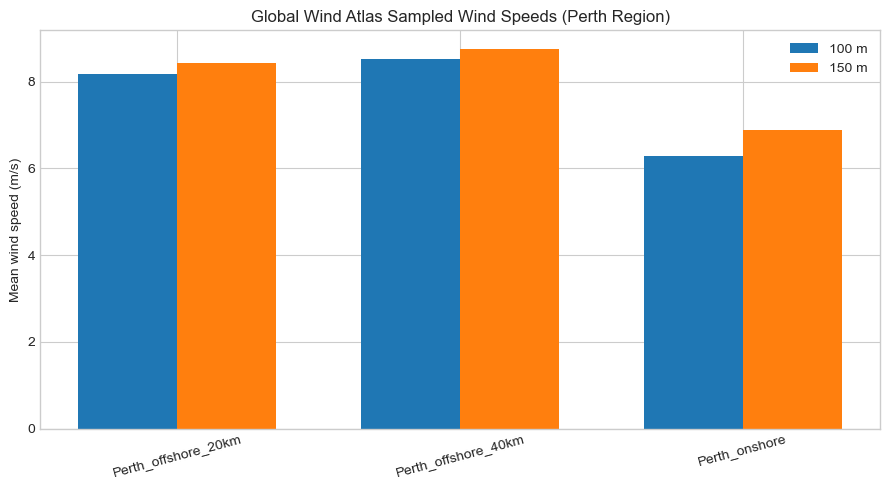

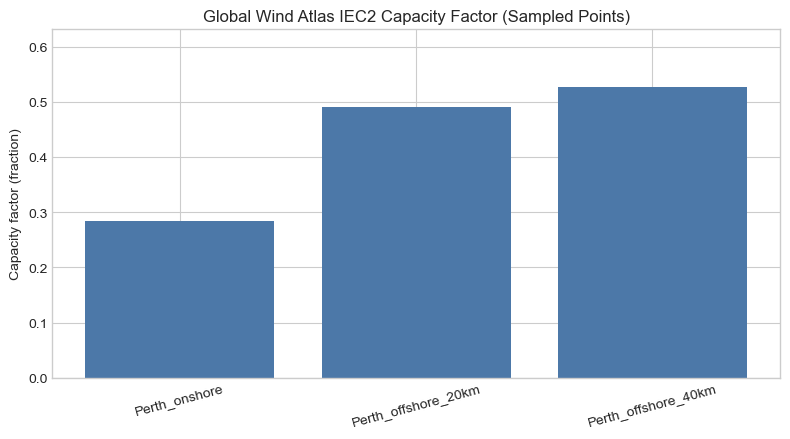

In [17]:
# Chart A: Wind speed comparison across sampled points
ws = wind_df[wind_df["metric"].isin(["wind_speed_100m_mps", "wind_speed_150m_mps"])].copy()
ws_plot = ws.pivot(index="point", columns="metric", values="value").reset_index()

fig, ax = plt.subplots(figsize=(9, 5))
x = range(len(ws_plot))
bar_w = 0.35
ax.bar([i - bar_w/2 for i in x], ws_plot["wind_speed_100m_mps"], width=bar_w, label="100 m")
ax.bar([i + bar_w/2 for i in x], ws_plot["wind_speed_150m_mps"], width=bar_w, label="150 m")
ax.set_xticks(list(x))
ax.set_xticklabels(ws_plot["point"], rotation=15)
ax.set_ylabel("Mean wind speed (m/s)")
ax.set_title("Global Wind Atlas Sampled Wind Speeds (Perth Region)")
ax.legend()
plt.tight_layout()
plt.show()

# Chart B: IEC2 capacity factor by point
cf = wind_df[wind_df["metric"] == "capacity_factor_IEC2"].copy()
fig, ax = plt.subplots(figsize=(8, 4.5))
ax.bar(cf["point"], cf["value"], color="#4C78A8")
ax.set_ylabel("Capacity factor (fraction)")
ax.set_title("Global Wind Atlas IEC2 Capacity Factor (Sampled Points)")
ax.set_ylim(0, max(cf["value"]) * 1.2)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

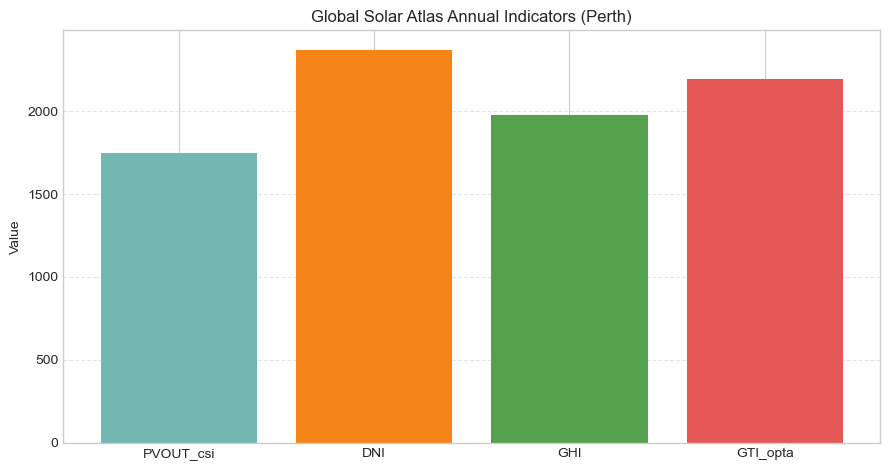

,metric,value,units
9,PVOUT_csi,"1,750.979",kWh/kWp/year
10,DNI,"2,369.258",kWh/m2/year
11,GHI,"1,979.938",kWh/m2/year
13,GTI_opta,"2,194.227",kWh/m2/year


In [18]:
# Chart C: Key solar annual indicators at Perth
solar_key = solar_df[solar_df["metric"].isin(["GHI", "DNI", "PVOUT_csi", "GTI_opta"])].copy()

fig, ax = plt.subplots(figsize=(9, 4.8))
ax.bar(solar_key["metric"], solar_key["value"], color=["#72B7B2", "#F58518", "#54A24B", "#E45756"])
ax.set_title("Global Solar Atlas Annual Indicators (Perth)")
ax.set_ylabel("Value")
ax.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

solar_key[["metric", "value", "units"]]

## 3) Interpretation and Recommendations

### A. Is Perth/WA already using wind and solar?

Yes. Existing operating assets include onshore wind (e.g., Emu Downs, Collgar, Albany/Grasmere) and utility-scale solar (e.g., Emu Downs Solar, Greenough River).

### B. Is offshore wind active now?

Not yet as an operating project in WA. The Bunbury offshore area has entered declared/proposed and feasibility pathways.

### C. Do atlas values support your hypothesis?

Yes.

- Solar values for Perth (GHI, PVOUT) are high and consistent with strong PV viability.
- Offshore wind sampled points are clearly stronger than central Perth onshore in both wind speed and IEC2 capacity factor.

### D. Practical implication for planning

A realistic strategy is:

1. Continue scaling utility solar + onshore wind in the SWIS,
2. Track offshore wind feasibility outcomes,
3. Use storage and transmission planning to integrate higher variable renewable penetration.

## 4) Sources Referenced in This Report

- Global Wind Atlas API endpoints (AUS wind speed and IEC2 capacity factor rasters)
- Global Solar Atlas point API: `https://api.globalsolaratlas.info/data/lta?loc=-31.9505,115.8605`
- APA (Emu Downs Wind)
- ARENA (Emu Downs Solar)
- Synergy pages (Wind, Solar)
- WA Government (large-scale solar page, offshore electricity FAQ)
- Collgar project page

## 5) Map of Existing/Planned Renewable Sites Near Perth

The figure below marks the renewable energy sites identified in this research (onshore wind, solar PV, and the Bunbury offshore wind declared area), with Perth shown as a reference point.

> Note: This is a schematic geographic map (lat/lon context) based on project locations used in this report.

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

map_path = Path("perth_renewables_map.png")
if not map_path.exists():
    raise FileNotFoundError(f"Map image not found: {map_path.resolve()}")

img = mpimg.imread(map_path)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Renewable Energy Sites Near Perth")
plt.show()